<a href="https://colab.research.google.com/github/hananedjellouadji/GMC_AI/blob/main/PROJET_AI_GMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
ds=pd.read_csv('wine_quality_data.csv', sep=';')
ds

In [ ]:
ds['quality']=ds["quality"].map({'good':1,'bad':0})
ds.fillna(ds.mode(),inplace=True)
ds

In [ ]:
g=sns.FacetGrid(ds,col='quality')
g.map(plt.hist,'volatile_acidity', bins=20)
g.add_legend()

In [ ]:
def plot_correlation_map(ds):
    corr=ds.corr()
    s,ax=plt.subplots(figsize=(13,10))
    cmap=sns.diverging_palette(270,20,as_cmap=True)
    s=sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize':12}
    )
plot_correlation_map(ds)

In [ ]:
x=ds[['residual_sugar','pH']].head(200).values
y=ds['quality'].head(200).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
plt.scatter(ds.residual_sugar,ds.quality, color='r')
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))
sns.regplot(x="residual_sugar",y='quality', data=ds)

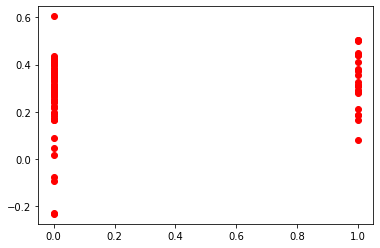

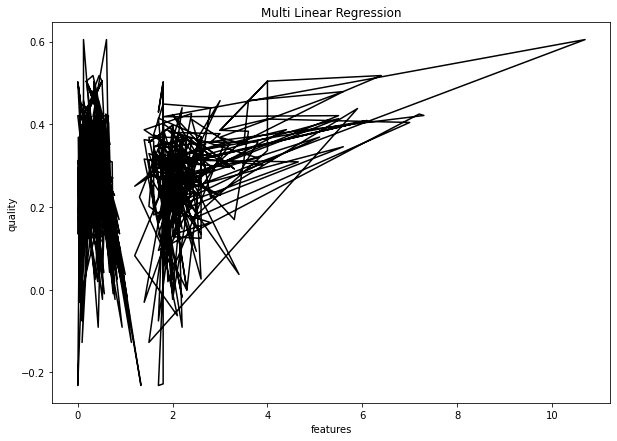

In [72]:
x=ds[['volatile_acidity','citric_acid','residual_sugar']].head(300).values
y=ds['quality'].head(300).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
plt.scatter(y_test,predicted,color='r') 
plt.figure(figsize=(10,7))
plt.ylabel('quality')
plt.xlabel('features')
plt.title('Multi Linear Regression')
plt.plot(x,model.predict(x),color='k')
plt.show()

In [73]:
x=ds[['residual_sugar','volatile_acidity','fixed acidity','citric_acid']].head(200).values
y=ds['quality'].head(200).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_pred,y_test))

Accuracy: 0.9


In [74]:
n_neighbors=30
scores=[]
for k in range(1,30):
  knn=KNeighborsClassifier(n_neighbors-k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
  scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.9
Accuracy for k= 2 is: 0.9
Accuracy for k= 3 is: 0.9
Accuracy for k= 4 is: 0.9
Accuracy for k= 5 is: 0.9
Accuracy for k= 6 is: 0.9
Accuracy for k= 7 is: 0.9
Accuracy for k= 8 is: 0.9
Accuracy for k= 9 is: 0.9
Accuracy for k= 10 is: 0.9
Accuracy for k= 11 is: 0.9
Accuracy for k= 12 is: 0.9
Accuracy for k= 13 is: 0.9
Accuracy for k= 14 is: 0.9
Accuracy for k= 15 is: 0.9
Accuracy for k= 16 is: 0.9
Accuracy for k= 17 is: 0.9
Accuracy for k= 18 is: 0.9
Accuracy for k= 19 is: 0.9
Accuracy for k= 20 is: 0.9
Accuracy for k= 21 is: 0.9
Accuracy for k= 22 is: 0.9
Accuracy for k= 23 is: 0.9
Accuracy for k= 24 is: 0.9
Accuracy for k= 25 is: 0.88
Accuracy for k= 26 is: 0.9
Accuracy for k= 27 is: 0.88
Accuracy for k= 28 is: 0.88
Accuracy for k= 29 is: 0.78


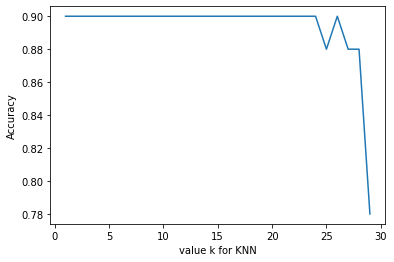

In [75]:
plt.plot(range(1,30),scores)
plt.xlabel('value k for KNN')
plt.ylabel('Accuracy')
plt.show()

In [92]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print("Score:{}".format(accuracy_score(y_pred,y_test)))

Score:0.7


In [ ]:
df=ds.drop('quality',axis=1)
df

In [81]:
model=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='complete')
clust_labels=model.fit_predict(df)
agglo=pd.DataFrame(clust_labels)
agglo

,0
0,3
1,1
2,1
3,1
4,3
...,...
601,3
602,1
603,1
604,3


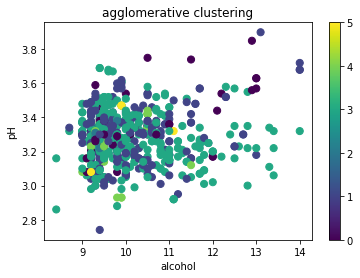

In [95]:
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(df['alcohol'],df['pH'],c=agglo[0],s=50)
ax.set_title('agglomerative clustering')
ax.set_xlabel('alcohol')
ax.set_ylabel('pH')
plt.colorbar(scatter)

In [99]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,4
1,2
2,4
3,2
4,4
...,...
601,0
602,2
603,2
604,0


In [ ]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='centroids')
plt.title('clusters')
plt.xlabel('alcohol')
plt.ylabel('pH')
plt.legend()
plt.show()

In [ ]:
sum_of_squared_distances=[]
K=range(1,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(df)
  sum_of_squared_distances.append(km.inertia_)

plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('k') 
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal K')
plt.show()

In [105]:
te=TransactionEncoder()
te_ary=te.fit(df).transform(df)
data=pd.DataFrame(te_ary,columns=te.columns_)
data

,,H,_,a,c,d,e,f,g,h,i,l,n,o,p,r,s,t,u,v,x,y
0,True,False,False,True,True,True,True,True,False,False,True,False,False,False,False,False,False,True,False,False,True,True
1,False,False,True,True,True,True,True,False,False,False,True,True,False,True,False,False,False,True,False,True,False,True
2,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
3,False,False,True,True,False,True,True,False,True,False,True,True,False,False,False,True,True,False,True,False,False,False
4,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
602,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [119]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_sets = data.applymap(encode_units)
frequent_itemsets=apriori(df_sets,min_support=0.001,use_colnames=True)
association_rules(frequent_itemsets,metric='confidence',min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( ),(a),0.00165,0.011551,0.00165,1.0,86.571429,0.001631,inf
1,( ),(c),0.00165,0.008251,0.00165,1.0,121.200000,0.001637,inf
2,( ),(d),0.00165,0.013201,0.00165,1.0,75.750000,0.001628,inf
3,( ),(e),0.00165,0.013201,0.00165,1.0,75.750000,0.001628,inf
4,( ),(f),0.00165,0.004950,0.00165,1.0,202.000000,0.001642,inf
...,...,...,...,...,...,...,...,...,...
883949,"(r, a, f)","(s, o, t, u, l, _, x, i, d, e)",0.00165,0.001650,0.00165,1.0,606.000000,0.001647,inf
883950,"(x, a, l)","(s, o, t, u, r, _, f, i, d, e)",0.00165,0.001650,0.00165,1.0,606.000000,0.001647,inf
883951,"(f, a, l)","(s, o, t, u, r, x, _, i, d, e)",0.00165,0.001650,0.00165,1.0,606.000000,0.001647,inf
883952,"(a, x, _)","(s, o, t, u, r, l, f, i, d, e)",0.00165,0.001650,0.00165,1.0,606.000000,0.001647,inf


In [120]:
association_rules(frequent_itemsets,metric='lift',min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(a),( ),0.011551,0.001650,0.00165,0.142857,86.571429,0.001631,1.164741
1,( ),(a),0.001650,0.011551,0.00165,1.000000,86.571429,0.001631,inf
2,(c),( ),0.008251,0.001650,0.00165,0.200000,121.200000,0.001637,1.247937
3,( ),(c),0.001650,0.008251,0.00165,1.000000,121.200000,0.001637,inf
4,(d),( ),0.013201,0.001650,0.00165,0.125000,75.750000,0.001628,1.140971
...,...,...,...,...,...,...,...,...,...
1860901,(a),"(s, o, t, u, r, l, _, x, f, i, d, e)",0.011551,0.001650,0.00165,0.142857,86.571429,0.001631,1.164741
1860902,(f),"(s, o, t, u, r, l, _, x, a, i, d, e)",0.004950,0.001650,0.00165,0.333333,202.000000,0.001642,1.497525
1860903,(i),"(s, o, t, u, r, l, _, x, a, f, d, e)",0.013201,0.001650,0.00165,0.125000,75.750000,0.001628,1.140971
1860904,(d),"(s, o, t, u, r, l, _, x, a, f, i, e)",0.013201,0.001650,0.00165,0.125000,75.750000,0.001628,1.140971
